# Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Define the parameters used to create the plots
rc = {'figure.figsize':(10,8),
      'axes.facecolor':'white',
      'figure.facecolor':'white',
      'axes.grid' : False,
      'font.size' : 20,    
      'font.sans-serif': 'Arial',
      'font.family': 'sans-serif',
      'svg.fonttype' : 'none' }

# Retina-enriched exons not in training data

In [3]:
sas  = pd.read_csv('../predictions/retina_sas_predictions.tsv', sep = '\t')
sds  = pd.read_csv('../predictions/retina_sds_predictions.tsv', sep = '\t')

sas = sas.drop_duplicates()
sds = sds.drop_duplicates()

print(len(sas))
print(len(sds))

115
107


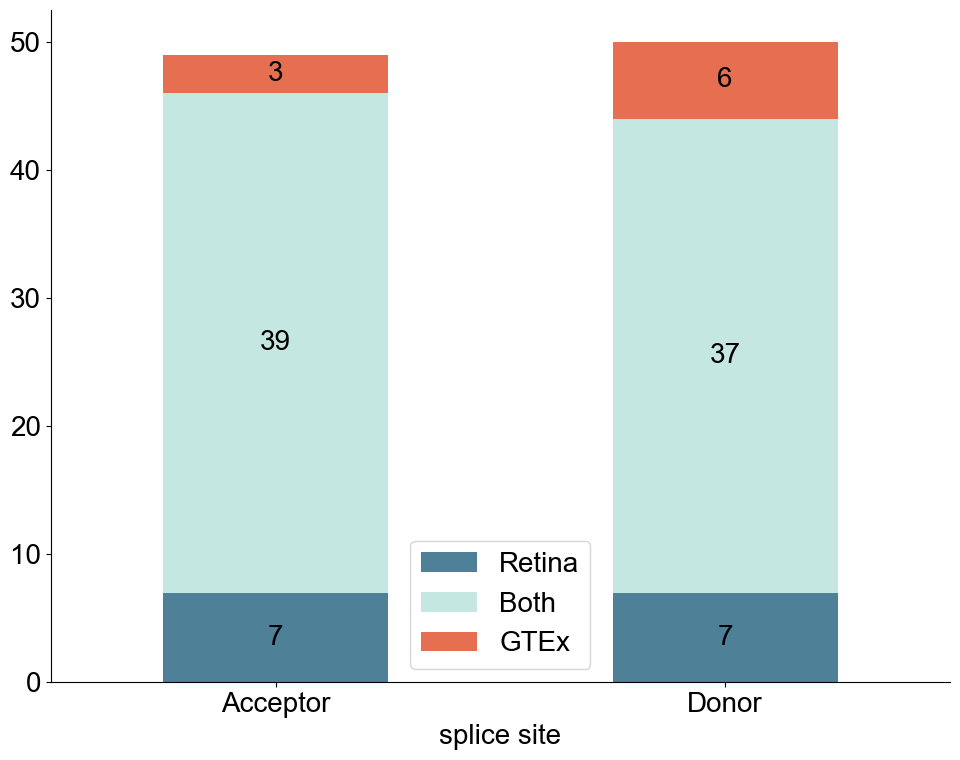

In [4]:
# stacked barplot
retina_sas = sas[sas['retina'] >= 0.22]
gtex_sas = sas[sas['gtex'] >= 0.39]
retina_sas = set(row['chr'] + ':' + str(row['position']) for index, row in retina_sas.iterrows())
gtex_sas = set(row['chr'] + ':' + str(row['position']) for index, row in gtex_sas.iterrows())

retina_sds = sds[sds['retina'] >= 0.22]
gtex_sds = sds[sds['gtex'] >= 0.38]
retina_sds = set(row['chr'] + ':' + str(row['position']) for index, row in retina_sds.iterrows())
gtex_sds = set(row['chr'] + ':' + str(row['position']) for index, row in gtex_sds.iterrows())

df = pd.DataFrame([['Acceptor',len(retina_sas - gtex_sas), len(retina_sas & gtex_sas), len(gtex_sas - retina_sas) ],
                   ['Donor', len(retina_sds - gtex_sds), len(retina_sds & gtex_sds), len(gtex_sds - retina_sds)]],
                   columns = ['splice site', 'Retina', 'Both', 'GTEx'])

plt.rcParams.update(rc)

# Create bar plot
ax = df.plot(x='splice site', kind='bar', stacked=True, color = ['#4E8098', '#C5E7E2', '#E76F51'])

# Display the plot
plt.xticks(rotation=0, ha='center', rotation_mode='anchor')

# Add data labels
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.text(x + width / 2, 
            y + height / 2, 
            '{:.0f}'.format(height), 
            ha='center', 
            va='center')

# Remove black x and y axis line
sns.despine(bottom = False, left = False)

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.savefig('plots/retina_exons_stacked.svg',  bbox_inches='tight', dpi = 300)
plt.show()
